In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer # Import SimpleImputer for handling NaNs
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel('predictores_nd.xlsx')
df.head()

,ID,SEXO,EDAD,PERTENENCIA_ETNICA,gp_desplaz,gp_migrant,gp_indigen,LOC_RES,REGIMEN_AFILIACION,TIPO_TB,CONDICION_INGRESO,RESULTADO_BK_RECOD,CONDICION_VIH,Consumidor_SPA,Desnutricion,Tabaquismo,Enf_Mental,PERDIDA_SEGUIMIENTO
0,1,M,25,OTRO,NO,NO,NO,FDB,P,PULMONAR,NUEVO,POSITIVO,NEGATIVO,NO,NO,NO,NO,NO
1,2,M,66,OTRO,NO,NO,NO,SO,S,PULMONAR,OPT,POSITIVO,NEGATIVO,NO,NO,NO,NO,NO
2,3,M,38,OTRO,NO,NO,NO,SO,S,PULMONAR,NUEVO,POSITIVO,NEGATIVO,NO,SI,NO,NO,NO
3,4,M,67,OTRO,NO,NO,NO,SO,S,PULMONAR,NUEVO,POSITIVO,NEGATIVO,NO,NO,SI,NO,NO
4,5,F,25,OTRO,NO,NO,NO,SO,S,PULMONAR,NUEVO,POSITIVO,NEGATIVO,NO,NO,NO,NO,NO


In [ ]:
print(df.columns)

Index(['ID', 'SEXO', 'EDAD', 'PERTENENCIA_ETNICA', 'gp_desplaz', 'gp_migrant',
       'gp_indigen', 'LOC_RES', 'REGIMEN_AFILIACION', 'TIPO_TB',
       'CONDICION_INGRESO', 'RESULTADO_BK_RECOD', 'CONDICION_VIH',
       'Consumidor_SPA', 'Desnutricion', 'Tabaquismo', 'Enf_Mental',
       'PERDIDA_SEGUIMIENTO'],
      dtype='object')


In [ ]:
df['PERDIDA_SEGUIMIENTO_N'] = df['PERDIDA_SEGUIMIENTO'].map({'NO': 0, 'SI': 1})
df_per = pd.DataFrame(df)
df_per.head()

,ID,SEXO,EDAD,PERTENENCIA_ETNICA,gp_desplaz,gp_migrant,gp_indigen,LOC_RES,REGIMEN_AFILIACION,TIPO_TB,CONDICION_INGRESO,RESULTADO_BK_RECOD,CONDICION_VIH,Consumidor_SPA,Desnutricion,Tabaquismo,Enf_Mental,PERDIDA_SEGUIMIENTO,PERDIDA_SEGUIMIENTO_N
0,1,M,25,OTRO,NO,NO,NO,FDB,P,PULMONAR,NUEVO,POSITIVO,NEGATIVO,NO,NO,NO,NO,NO,0
1,2,M,66,OTRO,NO,NO,NO,SO,S,PULMONAR,OPT,POSITIVO,NEGATIVO,NO,NO,NO,NO,NO,0
2,3,M,38,OTRO,NO,NO,NO,SO,S,PULMONAR,NUEVO,POSITIVO,NEGATIVO,NO,SI,NO,NO,NO,0
3,4,M,67,OTRO,NO,NO,NO,SO,S,PULMONAR,NUEVO,POSITIVO,NEGATIVO,NO,NO,SI,NO,NO,0
4,5,F,25,OTRO,NO,NO,NO,SO,S,PULMONAR,NUEVO,POSITIVO,NEGATIVO,NO,NO,NO,NO,NO,0


In [ ]:
categoric_columns = ['SEXO', 'PERTENENCIA_ETNICA', 'gp_desplaz', 'gp_migrant', 'gp_indigen', 'LOC_RES', 'REGIMEN_AFILIACION', 'TIPO_TB', 'CONDICION_INGRESO', 'RESULTADO_BK_RECOD','CONDICION_VIH', 'Consumidor_SPA','Desnutricion', 'Tabaquismo', 'Enf_Mental']
columns = list(df_per.columns)
numeric_columns = [i for i in columns if i not in categoric_columns]

In [ ]:
numeric_columns.remove('ID')
numeric_columns.remove('PERDIDA_SEGUIMIENTO')
numeric_columns.remove('PERDIDA_SEGUIMIENTO_N')

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder object
enc = OneHotEncoder(handle_unknown='ignore')

# Fit and transform the categorical columns
encoded_features = enc.fit_transform(df_per[categoric_columns])

# Create a new DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features.toarray(), columns=enc.get_feature_names_out(categoric_columns))

In [ ]:
print(encoded_df.columns)

Index(['SEXO_F', 'SEXO_M', 'PERTENENCIA_ETNICA_AFRO',
       'PERTENENCIA_ETNICA_INDIGENA', 'PERTENENCIA_ETNICA_OTRO',
       'PERTENENCIA_ETNICA_PALENQUERO', 'PERTENENCIA_ETNICA_RAIZAL',
       'PERTENENCIA_ETNICA_ROOM (GITANO)', 'gp_desplaz_NO', 'gp_desplaz_SI',
       'gp_migrant_NO', 'gp_migrant_SI', 'gp_indigen_NO', 'gp_indigen_SI',
       'LOC_RES_CO', 'LOC_RES_FDB', 'LOC_RES_NORTE', 'LOC_RES_SO',
       'LOC_RES_SUR', 'LOC_RES_Sin Dato', 'REGIMEN_AFILIACION_C',
       'REGIMEN_AFILIACION_E', 'REGIMEN_AFILIACION_N', 'REGIMEN_AFILIACION_P',
       'REGIMEN_AFILIACION_S', 'TIPO_TB_EXTRAPULMONAR', 'TIPO_TB_PULMONAR',
       'CONDICION_INGRESO_NUEVO', 'CONDICION_INGRESO_OPT',
       'CONDICION_INGRESO_REMITIDO', 'CONDICION_INGRESO_RTF',
       'CONDICION_INGRESO_RTPS', 'CONDICION_INGRESO_RTR',
       'RESULTADO_BK_RECOD_NEGATIVO', 'RESULTADO_BK_RECOD_NO REALIZADO',
       'RESULTADO_BK_RECOD_POSITIVO', 'RESULTADO_BK_RECOD_SD',
       'CONDICION_VIH_DESCONOCIDO', 'CONDICION_VIH_NEGATI

In [ ]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(df[numeric_columns])
scaled_num = numerical_features_scaled

In [ ]:
encoded_cat = enc.fit_transform(df_per[categoric_columns])
scaled_num = scaler.transform(df_per[numeric_columns])
scaled_num_df = pd.DataFrame(scaled_num, columns=numeric_columns, index=df.index)

In [ ]:
# Convert the sparse matrix to a DataFrame
encoded_cat_df = pd.DataFrame.sparse.from_spmatrix(encoded_cat,
                                                    index=df.index,
                                                    columns=enc.get_feature_names_out(categoric_columns))
                                                    # Assuming 'enc' is your OneHotEncoder and 'categoric_columns' are your categorical columns


# Now concatenate the DataFrames
df2 = pd.concat([scaled_num_df, encoded_cat_df, df['PERDIDA_SEGUIMIENTO_N']], axis=1)
print(df2['PERDIDA_SEGUIMIENTO_N'].value_counts())

PERDIDA_SEGUIMIENTO_N
0    9364
1     738
Name: count, dtype: int64


In [ ]:
df2.shape

(10102, 50)

In [ ]:
print(df2.columns)

Index(['EDAD', 'SEXO_F', 'SEXO_M', 'PERTENENCIA_ETNICA_AFRO',
       'PERTENENCIA_ETNICA_INDIGENA', 'PERTENENCIA_ETNICA_OTRO',
       'PERTENENCIA_ETNICA_PALENQUERO', 'PERTENENCIA_ETNICA_RAIZAL',
       'PERTENENCIA_ETNICA_ROOM (GITANO)', 'gp_desplaz_NO', 'gp_desplaz_SI',
       'gp_migrant_NO', 'gp_migrant_SI', 'gp_indigen_NO', 'gp_indigen_SI',
       'LOC_RES_CO', 'LOC_RES_FDB', 'LOC_RES_NORTE', 'LOC_RES_SO',
       'LOC_RES_SUR', 'LOC_RES_Sin Dato', 'REGIMEN_AFILIACION_C',
       'REGIMEN_AFILIACION_E', 'REGIMEN_AFILIACION_N', 'REGIMEN_AFILIACION_P',
       'REGIMEN_AFILIACION_S', 'TIPO_TB_EXTRAPULMONAR', 'TIPO_TB_PULMONAR',
       'CONDICION_INGRESO_NUEVO', 'CONDICION_INGRESO_OPT',
       'CONDICION_INGRESO_REMITIDO', 'CONDICION_INGRESO_RTF',
       'CONDICION_INGRESO_RTPS', 'CONDICION_INGRESO_RTR',
       'RESULTADO_BK_RECOD_NEGATIVO', 'RESULTADO_BK_RECOD_NO REALIZADO',
       'RESULTADO_BK_RECOD_POSITIVO', 'RESULTADO_BK_RECOD_SD',
       'CONDICION_VIH_DESCONOCIDO', 'CONDICION_VI

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

X = df2.drop('PERDIDA_SEGUIMIENTO_N', axis=1)
y = df2['PERDIDA_SEGUIMIENTO_N']

# Stratified split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, stratify=y_val, random_state=42)

# Printing the class distributions in the original dataset and the split sets
print("Original Class Distribution:")
print(f"Class 0: {np.sum(y == 0)}, Class 1: {np.sum(y == 1)}\n")

print("Training Set Class Distribution:")
print(f"Class 0: {np.sum(y_train == 0)}, Class 1: {np.sum(y_train == 1)}\n")

print("Validation Set Class Distribution:")
print(f"Class 0: {np.sum(y_val == 0)}, Class 1: {np.sum(y_val == 1)}\n")

print("Test Set Class Distribution:")
print(f"Class 0: {np.sum(y_test == 0)}, Class 1: {np.sum(y_test == 1)}\n")

# Create StratifiedShuffleSplit object
tratified_splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

# Perform stratified splitting
# Use the correct variable name 'tratified_splitter'
for train_index, test_index in tratified_splitter.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

Original Class Distribution:
Class 0: 9364, Class 1: 738

Training Set Class Distribution:
Class 0: 5618, Class 1: 443

Validation Set Class Distribution:
Class 0: 1873, Class 1: 147

Test Set Class Distribution:
Class 0: 1873, Class 1: 148



In [ ]:
X = df2.drop('PERDIDA_SEGUIMIENTO_N', axis=1)
y = df2['PERDIDA_SEGUIMIENTO_N']

# Stratified split
X_train_l, X_val_l, y_train_l, y_val_l = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_val_l, X_test_l, y_val_l, y_test_l = train_test_split(X_val_l, y_val_l, test_size=0.5, stratify=y_val_l, random_state=42)

In [ ]:
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
import time
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score, fbeta_score
from sklearn.metrics import roc_auc_score


## **SIN BALANCEO**

In [ ]:
# Create a Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)

# Define the number of cross-validation folds
cv_folds = 10

# Perform cross-validation and calculate the scores
cv_scores = cross_val_score(logreg_model, X_train_l, y_train_l, cv=cv_folds, scoring='recall')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

# Fit the model on the entire training set
logreg_model.fit(X_train_l, y_train_l)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test_l)

# Evaluate the model
accuracy = accuracy_score(y_test_l, y_pred)
recall = recall_score(y_test_l, y_pred)
precision = precision_score(y_test_l, y_pred)
f1 = f1_score(y_test_l, y_pred)
AUC = roc_auc_score(y_test_l, y_pred)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1-score:", f1)
print("AUC:", AUC)



Cross-validation scores: [0.08888889 0.15909091 0.06818182 0.20454545 0.02272727 0.04545455
 0.11363636 0.06818182 0.06666667 0.08888889]
Mean cross-validation score: 0.09262626262626263
Accuracy: 0.9277585353785255
Recall: 0.07432432432432433
Precision: 0.55
F1-score: 0.13095238095238096
AUC: 0.5347595994285798


In [ ]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear']  # Solver for logistic regression
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=logreg_model, param_grid=param_grid,
                           scoring='recall', cv=5, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train_l, y_train_l)

# Print the best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best recall score: ", grid_search.best_score_)

# Get the best model from the grid search
best_logreg_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_best = best_logreg_model.predict(X_test_l)

# Evaluate the model
accuracy_best = accuracy_score(y_test_l, y_pred_best)
recall_best = recall_score(y_test_l, y_pred_best)
precision_best = precision_score(y_test_l, y_pred_best)
f1_best = f1_score(y_test_l, y_pred_best)
AUC_best = roc_auc_score(y_test_l, y_pred_best)

print("Accuracy (best model):", accuracy_best)
print("Recall (best model):", recall_best)
print("Precision (best model):", precision_best)
print("F1-score (best model):", f1_best)
print("AUC(best model):", AUC_best)


Best parameters found:  {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best recall score:  0.08123084780388153
Accuracy (best model): 0.9277585353785255
Recall (best model): 0.08108108108108109
Precision (best model): 0.5454545454545454
F1-score (best model): 0.1411764705882353
AUC(best model): 0.5378710263921156


In [ ]:
cm1 = confusion_matrix(y_test_l, y_pred_best)
lg_Recall = recall_score(y_test_l, y_pred_best)
lg_Precision = precision_score(y_test_l, y_pred_best)
lg_f1 = f1_score(y_test_l, y_pred_best)
lg_accuracy = accuracy_score(y_test_l, y_pred_best)
lg_beta_score = fbeta_score(y_test_l, y_pred_best, beta=2, average='binary')
lg_AUC = roc_auc_score(y_test_l, y_pred_best)
print(cm1)

[[1863   10]
 [ 136   12]]


Text(0.5, 427.9555555555555, 'Predicted label')

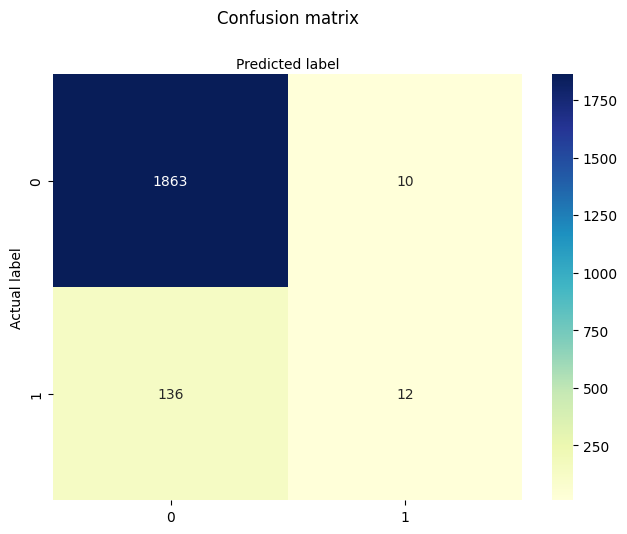

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm1), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
ndf = [(lg_Recall, lg_Precision, lg_f1, lg_accuracy, lg_AUC )]

lg_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy', 'AUC'])
lg_score.insert(0, 'Logit with', 'none')
lg_score

,Logit with,Recall,Precision,F1 Score,Accuracy,AUC
0,none,0.081081,0.545455,0.141176,0.927759,0.537871


In [ ]:
time_start = time.time()
np.int = int
best_logreg_model.fit(X_train_l, y_train_l)
time_lg  = time.time() - time_start
values_lg  = [1, grid_search.best_score_, time_lg]
results_lg  = pd.DataFrame([values_lg], columns=['logisticregression__C', 'best_score', 'time'])
results_lg

,logisticregression__C,best_score,time
0,1,0.081231,1.013137


## **OVERSAMPLING**

In [ ]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42) # Assuming 5 folds; adjust as needed
random_overs_pipeline_logit = make_pipeline(RandomOverSampler(random_state=42),
                              LogisticRegression(random_state=16, max_iter=10000, solver="lbfgs", tol=0.01)) #solver="lbfgs", max_iter=500, tol=0.01  class_weight=None

In [ ]:
score8 = cross_val_score(random_overs_pipeline_logit, X_train_l, y_train_l, scoring='recall', cv=kf)
print("Cross Validation Recall Scores are: {}".format(score8))
print("Average Cross Validation Recall score: {}".format(score8.mean()))

Cross Validation Recall Scores are: [0.48888889 0.72727273 0.63636364 0.54545455 0.59090909 0.63636364
 0.70454545 0.56818182 0.51111111 0.62222222]
Average Cross Validation Recall score: 0.6031313131313132


In [ ]:
new_params = {
    'randomoversampler__sampling_strategy': [0.5, 0.75, 1.0],  # Different oversampling ratios
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Regularization strength
    'logisticregression__solver': ['lbfgs', 'liblinear'],  # Different solvers
    'logisticregression__class_weight': ['balanced']
}

grid_over_lg = GridSearchCV(random_overs_pipeline_logit, param_grid=new_params, cv=kf, scoring='recall',
                        return_train_score=True)
grid_over_lg.fit(X_train_l, y_train_l)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('randomoversampler',
                                        RandomOverSampler(random_state=42)),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=10000,
                                                           random_state=16,
                                                           tol=0.01))]),
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100,
                                                   1000],
                         'logisticregression__class_weight': ['balanced'],
                         'logisticregression__solver': ['lbfgs', 'liblinear'],
                         'randomoversampler__sampling_strategy': [0.5, 0.75,
                                                                  1.0]},
             return_train_score=True, scoring='recall')

In [ ]:
print('Best parameters:', grid_over_lg.best_params_)
print('Best score:', grid_over_lg.best_score_)

Best parameters: {'logisticregression__C': 0.001, 'logisticregression__class_weight': 'balanced', 'logisticregression__solver': 'lbfgs', 'randomoversampler__sampling_strategy': 0.5}
Best score: 0.6843939393939393


In [ ]:
y_pred_over_lg = grid_over_lg.best_estimator_.named_steps['logisticregression'].predict(X_test_l)

In [ ]:
cm2 = confusion_matrix(y_test_l, y_pred_over_lg)
over_lg_Recall = recall_score(y_test_l, y_pred_over_lg)
over_lg_Precision = precision_score(y_test_l, y_pred_over_lg)
over_lg_f1 = f1_score(y_test_l, y_pred_over_lg)
over_lg_accuracy = accuracy_score(y_test_l, y_pred_over_lg)
over_lg_beta_score = fbeta_score(y_test_l, y_pred_over_lg, beta=2, average='binary')
over_lg_AUC = roc_auc_score(y_test_l, y_pred_over_lg)
print(cm2)

[[1318  555]
 [  46  102]]


Text(0.5, 427.9555555555555, 'Predicted label')

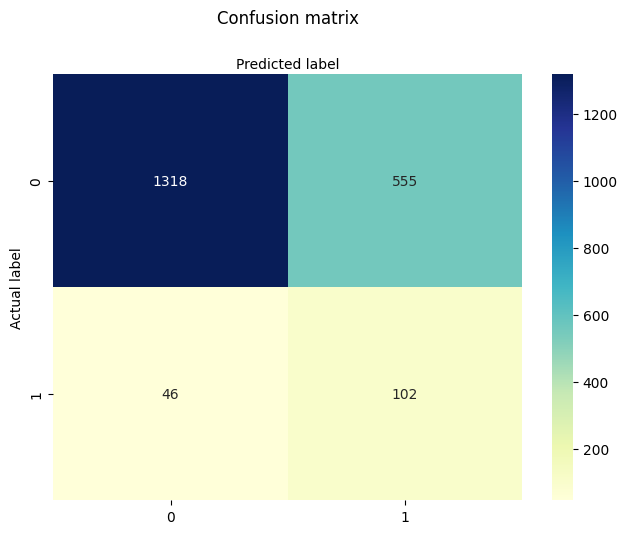

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
ndf = [(over_lg_Recall, over_lg_Precision, over_lg_f1, over_lg_accuracy, over_lg_AUC)]

over_lg_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy', 'AUC'])
over_lg_score.insert(0, 'Logit with', 'Oversampling')
over_lg_score

,Logit with,Recall,Precision,F1 Score,Accuracy,AUC
0,Oversampling,0.689189,0.155251,0.253416,0.702622,0.696437


In [ ]:
time_start = time.time()
np.int = int
grid_over_lg.fit(X_train_l, y_train_l)
time_grid_over_lg  = time.time() - time_start
values_grid_over_lg  = [0.001, grid_over_lg .best_score_, time_grid_over_lg]
results_grid_over_lg  = pd.DataFrame([values_grid_over_lg], columns=['logisticregression__C', 'best_score', 'time'])
results_grid_over_lg

,logisticregression__C,best_score,time
0,0.001,0.684394,84.478097


## **LOGIT + SMOTE**

In [ ]:
X = df2.drop('PERDIDA_SEGUIMIENTO_N', axis=1)
y = df2['PERDIDA_SEGUIMIENTO_N']

# Stratified split
X_train_ls, X_val_ls, y_train_ls, y_val_ls = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_val_ls, X_test_ls, y_val_ls, y_test_ls = train_test_split(X_val_ls, y_val_ls, test_size=0.5, stratify=y_val_ls, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline, make_pipeline

smote_pipeline = make_pipeline(SMOTE(random_state=42),
                              LogisticRegression(random_state=16, max_iter=10000, solver="lbfgs", tol=0.01))

In [ ]:
score9 = cross_val_score(smote_pipeline, X_train_ls, y_train_ls, scoring='recall', cv=kf)
print("Cross Validation Recall Scores are: {}".format(score9))
print("Average Cross Validation Recall score: {}".format(score9.mean()))

Cross Validation Recall Scores are: [0.51111111 0.75       0.61363636 0.54545455 0.56818182 0.63636364
 0.72727273 0.56818182 0.51111111 0.68888889]
Average Cross Validation Recall score: 0.612020202020202


In [ ]:
new_params = {
    'smote__sampling_strategy': [0.5, 0.75, 1.0],  # Different oversampling ratios
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Regularization strength
    'logisticregression__solver': ['lbfgs', 'liblinear'],  # Different solvers
    'logisticregression__class_weight': ['balanced']
}

smote_lg = GridSearchCV(smote_pipeline, param_grid=new_params, cv=kf, scoring='recall',
                        return_train_score=True)
smote_lg.fit(X_train_ls, y_train_ls)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=10000,
                                                           random_state=16,
                                                           tol=0.01))]),
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100,
                                                   1000],
                         'logisticregression__class_weight': ['balanced'],
                         'logisticregression__solver': ['lbfgs', 'liblinear'],
                         'smote__sampling_strategy': [0.5, 0.75, 1.0]},
             return_train_score=True, scoring='recall')

In [ ]:
print('Best parameters:', smote_lg.best_params_)
print('Best score:', smote_lg.best_score_)

Best parameters: {'logisticregression__C': 0.001, 'logisticregression__class_weight': 'balanced', 'logisticregression__solver': 'lbfgs', 'smote__sampling_strategy': 0.75}
Best score: 0.6957070707070707


In [ ]:
y_pred_smote_lg = smote_lg.best_estimator_.named_steps['logisticregression'].predict(X_test_ls)

In [ ]:
cm3 = confusion_matrix(y_test_ls, y_pred_smote_lg)
smote_lg_Recall = recall_score(y_test_ls, y_pred_smote_lg)
smote_lg_Precision = precision_score(y_test_ls, y_pred_smote_lg)
smote_lg_f1 = f1_score(y_test_ls, y_pred_smote_lg)
smote_lg_accuracy = accuracy_score(y_test_ls, y_pred_smote_lg)
smote_lg_beta_score = fbeta_score(y_test_ls, y_pred_smote_lg, beta=2, average='binary')
smote_lg_AUC = roc_auc_score(y_test_ls, y_pred_smote_lg)
print(cm3)

[[1304  569]
 [  47  101]]


Text(0.5, 427.9555555555555, 'Predicted label')

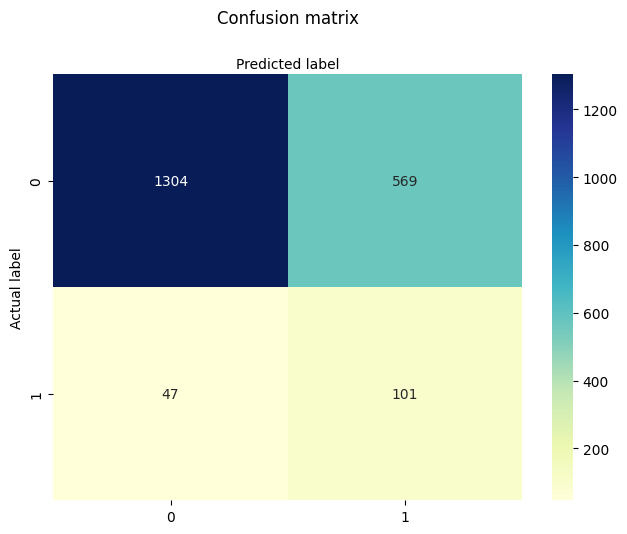

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm3), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
ndf = [(smote_lg_Recall, smote_lg_Precision, smote_lg_f1, smote_lg_accuracy, smote_lg_AUC)]

smote_lg_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy', 'AUC'])
smote_lg_score.insert(0, 'Logit with', ' SMOTE Oversampling')
smote_lg_score


,Logit with,Recall,Precision,F1 Score,Accuracy,AUC
0,SMOTE Oversampling,0.682432,0.150746,0.246944,0.6952,0.689321


In [ ]:
time_start = time.time()
np.int = int
smote_lg.fit(X_train_ls, y_train_ls)
time_smote_lg  = time.time() - time_start
values_smote_lg  = [0.001, smote_lg.best_score_, time_smote_lg]
results_smote_lg  = pd.DataFrame([values_smote_lg], columns=['logisticregression__C', 'best_score', 'time'])
results_smote_lg

,logisticregression__C,best_score,time
0,0.001,0.695707,78.856547


## **LOGIT + SMOTE TOMEK**

In [ ]:
X = df2.drop('PERDIDA_SEGUIMIENTO_N', axis=1)
y = df2['PERDIDA_SEGUIMIENTO_N']

# Stratified split
X_train_lst, X_val_lst, y_train_lst, y_val_lst = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_val_lst, X_test_lst, y_val_lst, y_test_lst = train_test_split(X_val_lst, y_val_lst, test_size=0.5, stratify=y_val_lst, random_state=42)

In [ ]:
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import TomekLinks

SMOTETomek_pipeline_lg = make_pipeline(SMOTETomek(tomek=TomekLinks(sampling_strategy='majority')),
                              LogisticRegression(random_state=16, max_iter=10000, solver="lbfgs", tol=0.01))

In [ ]:
score10 = cross_val_score(SMOTETomek_pipeline_lg, X_train_lst, y_train_lst, scoring='recall', cv=kf)
print("Cross Validation Recall Scores are: {}".format(score10))
print("Average Cross Validation Recall score: {}".format(score10.mean()))

Cross Validation Recall Scores are: [0.6        0.75       0.63636364 0.68181818 0.56818182 0.61363636
 0.75       0.59090909 0.55555556 0.75555556]
Average Cross Validation Recall score: 0.6502020202020201


In [ ]:
new_params = {
    'smotetomek__sampling_strategy': [0.5, 0.75, 1.0],  # Different oversampling ratios
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Regularization strength
    'logisticregression__solver': ['lbfgs', 'liblinear'],  # Different solvers
    'logisticregression__class_weight': ['balanced']
}

grid_SMOTETomek_lg= GridSearchCV(SMOTETomek_pipeline_lg, param_grid=new_params, cv=kf, scoring='recall',
                        return_train_score=True)
grid_SMOTETomek_lg.fit(X_train_lst, y_train_lst)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('smotetomek',
                                        SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=10000,
                                                           random_state=16,
                                                           tol=0.01))]),
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100,
                                                   1000],
                         'logisticregression__class_weight': ['balanced'],
                         'logisticregression__solver': ['lbfgs', 'liblinear'],
                         'smotetomek__sampling_strategy': [0.5, 0.75, 1.0]},
             return_train_score=True, scoring='recall')

In [ ]:
print('Best parameters:', grid_SMOTETomek_lg.best_params_)
print('Best score:', grid_SMOTETomek_lg.best_score_)

Best parameters: {'logisticregression__C': 0.001, 'logisticregression__class_weight': 'balanced', 'logisticregression__solver': 'lbfgs', 'smotetomek__sampling_strategy': 1.0}
Best score: 0.6979292929292928


In [ ]:
SMOTETomek_lg = grid_SMOTETomek_lg.best_estimator_
y_pred_smoteT_lg = SMOTETomek_lg.predict(X_test_lst)

In [ ]:
cm4 = confusion_matrix(y_test_lst, y_pred_smoteT_lg)
SMOTETomek_lg_Recall = recall_score(y_test_lst, y_pred_smoteT_lg)
SMOTETomek_lg_Precision = precision_score(y_test_lst, y_pred_smoteT_lg)
SMOTETomek_lg_f1 = f1_score(y_test_lst, y_pred_smoteT_lg)
SMOTETomek_lg_accuracy = accuracy_score(y_test_lst, y_pred_smoteT_lg)
SMOTETomek_lg_beta_score = fbeta_score(y_test_lst, y_pred_smoteT_lg, beta=2, average='binary')
SMOTETomek_lg_AUC = roc_auc_score(y_test_lst, y_pred_smoteT_lg)
print(cm4)

[[1298  575]
 [  48  100]]


Text(0.5, 427.9555555555555, 'Predicted label')

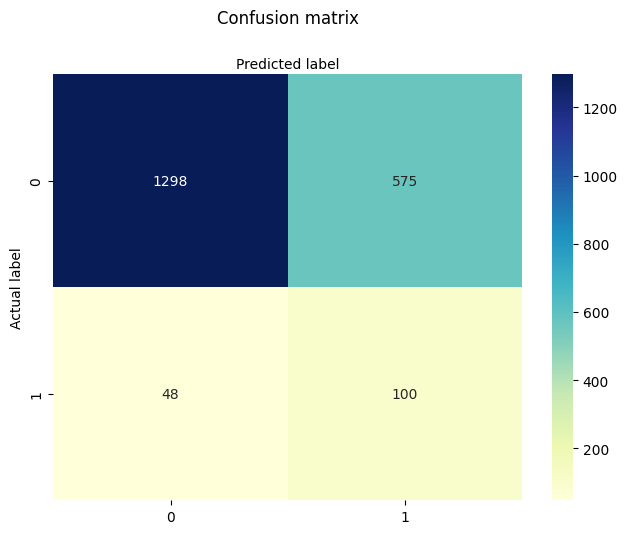

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm4), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
ndf = [(SMOTETomek_lg_Recall, SMOTETomek_lg_Precision, SMOTETomek_lg_f1, SMOTETomek_lg_accuracy, SMOTETomek_lg_AUC)]
SMOTETomek_lg_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy','AUC'])
SMOTETomek_lg_score.insert(0, 'Logit with', 'SMOTE + Tomek')
SMOTETomek_lg_score

,Logit with,Recall,Precision,F1 Score,Accuracy,AUC
0,SMOTE + Tomek,0.675676,0.148148,0.243013,0.691737,0.684341


In [ ]:
time_start = time.time()
np.int = int
grid_SMOTETomek_lg.fit(X_train_lst, y_train_lst)
time_grid_SMOTETomek_lg  = time.time() - time_start
values_grid_SMOTETomek_lg  = [0.001, smote_lg.best_score_, time_grid_SMOTETomek_lg]
results_grid_SMOTETomek_lg  = pd.DataFrame([values_grid_SMOTETomek_lg], columns=['logisticregression__C', 'best_score', 'time'])
results_grid_SMOTETomek_lg

,logisticregression__C,best_score,time
0,0.001,0.695707,372.172465


## **LOGIT + TOMEK UNDERSAMPLING**

In [ ]:
X = df2.drop('PERDIDA_SEGUIMIENTO_N', axis=1)
y = df2['PERDIDA_SEGUIMIENTO_N']

# Stratified split
X_train_ltu, X_val_ltu, y_train_ltu, y_val_ltu = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_val_ltu, X_test_ltu, y_val_ltu, y_test_ltu = train_test_split(X_val_ltu, y_val_ltu, test_size=0.5, stratify=y_val_ltu, random_state=42)

In [ ]:
from imblearn.under_sampling import TomekLinks

# define the undersampling method
#tomekU = TomekLinks(sampling_strategy='auto', n_jobs=-1)
tomekU = TomekLinks()

In [ ]:
# fit and apply the transform
X_underT_lg, y_underT_lg = tomekU.fit_resample(X_train_ltu, y_train_ltu)

In [ ]:
print('No perdida:', np.sum(y_underT_lg == 0), '/', round(np.sum(y_underT_lg == 0)/len(y_underT_lg) * 100,2), '% of the dataset')
print('Perdida:', np.sum(y_underT_lg == 1), '/',round(np.sum(y_underT_lg == 1)/len(y_underT_lg) * 100,2), '% of the dataset')

No perdida: 5468 / 92.51 % of the dataset
Perdida: 443 / 7.49 % of the dataset


In [ ]:
underT_pipeline_lg = make_pipeline(tomekU,
                                LogisticRegression(random_state=16, max_iter=10000, solver="lbfgs", tol=0.01))

In [ ]:
score11 = cross_val_score(underT_pipeline_lg, X_train_ltu, y_train_ltu, scoring='recall', cv=kf)
print("Cross Validation Recall Scores are: {}".format(score11))
print("Average Cross Validation Recall score: {}".format(score11.mean()))

Cross Validation Recall Scores are: [0.04444444 0.04545455 0.04545455 0.04545455 0.04545455 0.11363636
 0.04545455 0.09090909 0.02222222 0.08888889]
Average Cross Validation Recall score: 0.058737373737373734


In [ ]:
new_params = {
    #'tomeklinks__sampling_strategy': [0.5, 0.75, 1.0],  # Different oversampling ratios
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Regularization strength
    'logisticregression__solver': ['lbfgs', 'liblinear'],  # Different solvers
    #'logisticregression__class_weight': ['balanced']
}
underT_lg = GridSearchCV(underT_pipeline_lg, param_grid=new_params, cv=kf, scoring='recall',
                        return_train_score=True)
underT_lg.fit(X_train_ltu, y_train_ltu)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('tomeklinks', TomekLinks()),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=10000,
                                                           random_state=16,
                                                           tol=0.01))]),
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100,
                                                   1000],
                         'logisticregression__solver': ['lbfgs', 'liblinear']},
             return_train_score=True, scoring='recall')

In [ ]:
print('Best parameters:', underT_lg.best_params_)
print('Best score:', underT_lg.best_score_)

Best parameters: {'logisticregression__C': 1, 'logisticregression__solver': 'liblinear'}
Best score: 0.1106060606060606


In [ ]:
y_pred_underT_lg = underT_lg.best_estimator_.named_steps['logisticregression'].predict(X_test_ltu)

In [ ]:
cm5 = confusion_matrix(y_test_ltu, y_pred_underT_lg)
underT_lg_Recall = recall_score(y_test_ltu, y_pred_underT_lg)
underT_lg_Precision = precision_score(y_test_ltu, y_pred_underT_lg)
underT_lg_f1 = f1_score(y_test_ltu, y_pred_underT_lg)
underT_lg_accuracy = accuracy_score(y_test_ltu, y_pred_underT_lg)
underT_lg_beta_score = fbeta_score(y_test_ltu, y_pred_underT_lg, beta=2, average='binary')
underT_lg_AUC = roc_auc_score(y_test_ltu, y_pred_underT_lg)
print(cm5)

[[1859   14]
 [ 132   16]]


Text(0.5, 427.9555555555555, 'Predicted label')

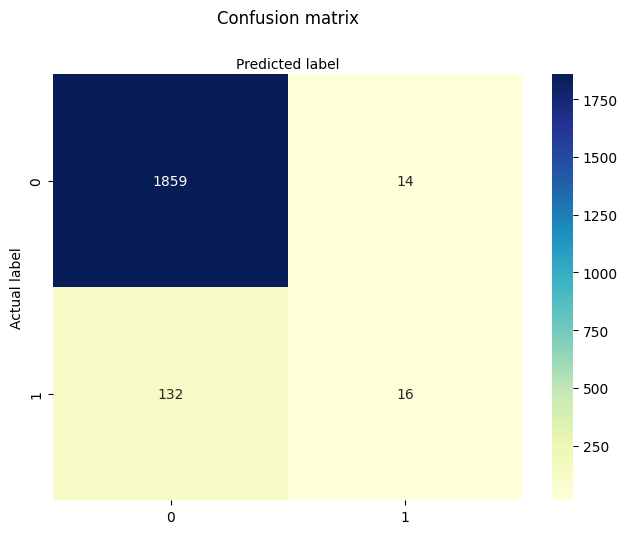

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm5), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
ndf = [(underT_lg_Recall, underT_lg_Precision, underT_lg_f1, underT_lg_accuracy, underT_lg_AUC)]
underT_lg_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy','AUC'])
underT_lg_score.insert(0, 'Logit with', 'Tomek undersampling')
underT_lg_score

,Logit with,Recall,Precision,F1 Score,Accuracy,AUC
0,Tomek undersampling,0.108108,0.533333,0.179775,0.927759,0.550317


In [ ]:
time_start = time.time()
np.int = int
underT_lg.fit(X_train_ltu, y_train_ltu)
time_underT_lg  = time.time() - time_start
values_underT_lg  = [100, underT_lg.best_score_, time_underT_lg]
results_underT_lg  = pd.DataFrame([values_underT_lg], columns=['logisticregression__C', 'best_score', 'time'])
results_underT_lg

,logisticregression__C,best_score,time
0,100,0.110606,55.113378


## **LOGIT Undersampling**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
# define oversampling strategy
rus = RandomUnderSampler(random_state=42)

In [ ]:
X = df2.drop('PERDIDA_SEGUIMIENTO_N', axis=1)
y = df2['PERDIDA_SEGUIMIENTO_N']

# Stratified split
X_train_lu, X_val_lu, y_train_lu, y_val_lu = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_val_lu, X_test_lu, y_val_lu, y_test_lu = train_test_split(X_val_lu, y_val_lu, test_size=0.5, stratify=y_val_lu, random_state=42)

In [ ]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42) # Assuming 5 folds; adjust as needed
random_unders_pipeline_logit = make_pipeline(RandomUnderSampler(random_state=42),
                              LogisticRegression(random_state=16, max_iter=10000, solver="lbfgs", tol=0.01)) #solver="lbfgs", max_iter=500, tol=0.01  class_weight=None

In [ ]:
score12 = cross_val_score(random_unders_pipeline_logit, X_train_lu, y_train_lu, scoring='recall', cv=kf)
print("Cross Validation Recall Scores are: {}".format(score12))
print("Average Cross Validation Recall score: {}".format(score12.mean()))


Cross Validation Recall Scores are: [0.53333333 0.72727273 0.56818182 0.59090909 0.63636364 0.65909091
 0.72727273 0.59090909 0.51111111 0.68888889]
Average Cross Validation Recall score: 0.6233333333333333


In [ ]:
new_params = {
    'randomundersampler__sampling_strategy': [0.5, 0.75, 1.0],  # Different oversampling ratios
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Regularization strength
    'logisticregression__solver': ['lbfgs', 'liblinear'],  # Different solvers
    'logisticregression__class_weight': ['balanced']
}

grid_under_lgu = GridSearchCV(random_unders_pipeline_logit, param_grid=new_params, cv=kf, scoring='recall',
                        return_train_score=True)
grid_under_lgu.fit(X_train_lu, y_train_lu)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('randomundersampler',
                                        RandomUnderSampler(random_state=42)),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=10000,
                                                           random_state=16,
                                                           tol=0.01))]),
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100,
                                                   1000],
                         'logisticregression__class_weight': ['balanced'],
                         'logisticregression__solver': ['lbfgs', 'liblinear'],
                         'randomundersampler__sampling_strategy': [0.5, 0.75,
                                                                   1.0]},
             return_train_score=True, scoring='recall')

In [ ]:
print('Best parameters:', grid_under_lgu.best_params_)
print('Best score:', grid_under_lgu.best_score_)

Best parameters: {'logisticregression__C': 0.01, 'logisticregression__class_weight': 'balanced', 'logisticregression__solver': 'lbfgs', 'randomundersampler__sampling_strategy': 1.0}
Best score: 0.6887878787878787


In [ ]:
y_pred_lgu = grid_under_lgu.best_estimator_.named_steps['logisticregression'].predict(X_test_lu)


In [ ]:
cm6 = confusion_matrix(y_test_lu, y_pred_lgu)
under_lgu_Recall = recall_score(y_test_lu, y_pred_lgu)
under_lgu_Precision = precision_score(y_test_lu, y_pred_lgu)
under_lgu_f1 = f1_score(y_test_lu, y_pred_lgu)
under_lgu_accuracy = accuracy_score(y_test_lu, y_pred_lgu)
under_lgu_beta_score = fbeta_score(y_test_lu, y_pred_lgu, beta=2, average='binary')
under_lgu_AUC = roc_auc_score(y_test_lu, y_pred_lgu)
print(cm6)

[[1328  545]
 [  47  101]]


Text(0.5, 427.9555555555555, 'Predicted label')

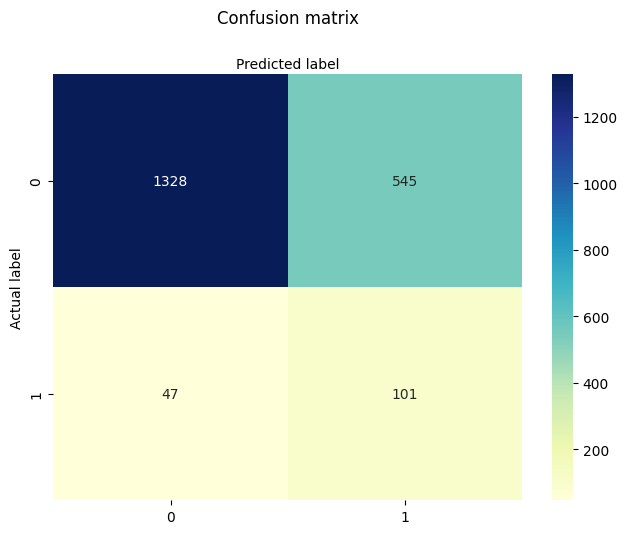

In [ ]:

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm6), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
ndf = [(under_lgu_Recall, under_lgu_Precision, under_lgu_f1, under_lgu_accuracy, under_lgu_AUC )]

under_lgu_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy', 'AUC'])
under_lgu_score.insert(0, 'Logit with', 'Undersampling')
under_lgu_score


,Logit with,Recall,Precision,F1 Score,Accuracy,AUC
0,Undersampling,0.682432,0.156347,0.254408,0.707076,0.695728


In [ ]:
time_start = time.time()
np.int = int
grid_under_lgu.fit(X_train_lu, y_train_lu)
time_grid_under_lgu  = time.time() - time_start
values_grid_under_lgu  = [0.001, grid_under_lgu.best_score_, time_grid_under_lgu]
results_grid_under_lgu  = pd.DataFrame([values_grid_under_lgu], columns=['logisticregression__C', 'best_score', 'time'])
results_grid_under_lgu

,logisticregression__C,best_score,time
0,0.001,0.688788,42.407341


## **Comparacion metricas Logit**

In [ ]:
predictions2 = pd.concat([lg_score, over_lg_score, smote_lg_score, SMOTETomek_lg_score, underT_lg_score, under_lgu_score], ignore_index=True, sort=False)
predictions2.sort_values(by=['Recall'], ascending=False)

,Logit with,Recall,Precision,F1 Score,Accuracy,AUC
1,Oversampling,0.689189,0.155251,0.253416,0.702622,0.696437
2,SMOTE Oversampling,0.682432,0.150746,0.246944,0.695200,0.689321
5,Undersampling,0.682432,0.156347,0.254408,0.707076,0.695728
3,SMOTE + Tomek,0.675676,0.148148,0.243013,0.691737,0.684341
4,Tomek undersampling,0.108108,0.533333,0.179775,0.927759,0.550317
0,none,0.081081,0.545455,0.141176,0.927759,0.537871


## **Comparacion tiempos**

In [ ]:
results_combined = pd.concat([results_lg, results_grid_over_lg, results_smote_lg, results_grid_SMOTETomek_lg, results_underT_lg, results_grid_under_lgu], ignore_index=True)
results_combined.index = ['Sin balanceo', 'Oversampling','SMOTE + Tomek', 'SMOTE Oversampling', 'tomek undersampling', 'Undersampling']
results_combined.sort_values(by=['time'], ascending=True)

,logisticregression__C,best_score,time
Sin balanceo,1.000,0.081231,1.013137
Undersampling,0.001,0.688788,42.407341
tomek undersampling,100.000,0.110606,55.113378
SMOTE + Tomek,0.001,0.695707,78.856547
Oversampling,0.001,0.684394,84.478097
SMOTE Oversampling,0.001,0.695707,372.172465
